In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
sample=pd.read_csv("../input/sample_submission.csv")
sample['airid']=sample['id'].map(lambda u: "_".join(u.split('_')[:2]))
sample['date']=sample['id'].map(lambda u: pd.to_datetime(u.split('_')[-1]))

In [3]:
print sample.shape
sample.head()

(32019, 4)


id  visitors                 airid       date
0  air_00a91d42b08b08d9_2017-04-23         0  air_00a91d42b08b08d9 2017-04-23
1  air_00a91d42b08b08d9_2017-04-24         0  air_00a91d42b08b08d9 2017-04-24
2  air_00a91d42b08b08d9_2017-04-25         0  air_00a91d42b08b08d9 2017-04-25
3  air_00a91d42b08b08d9_2017-04-26         0  air_00a91d42b08b08d9 2017-04-26
4  air_00a91d42b08b08d9_2017-04-27         0  air_00a91d42b08b08d9 2017-04-27

In [4]:
sample_airids=set(sample['airid'])
sample['airid'].value_counts().shape,len(sample_airids)

((821,), 821)

In [5]:
sample['date'].value_counts().sort_index()

2017-04-23    821
2017-04-24    821
2017-04-25    821
2017-04-26    821
2017-04-27    821
2017-04-28    821
2017-04-29    821
2017-04-30    821
2017-05-01    821
2017-05-02    821
2017-05-03    821
2017-05-04    821
2017-05-05    821
2017-05-06    821
2017-05-07    821
2017-05-08    821
2017-05-09    821
2017-05-10    821
2017-05-11    821
2017-05-12    821
2017-05-13    821
2017-05-14    821
2017-05-15    821
2017-05-16    821
2017-05-17    821
2017-05-18    821
2017-05-19    821
2017-05-20    821
2017-05-21    821
2017-05-22    821
2017-05-23    821
2017-05-24    821
2017-05-25    821
2017-05-26    821
2017-05-27    821
2017-05-28    821
2017-05-29    821
2017-05-30    821
2017-05-31    821
Name: date, dtype: int64

# air reserve

In [6]:
air_rsv=pd.read_csv("../input/air_reserve.csv",parse_dates=['visit_datetime','reserve_datetime'])

In [30]:
air_rsv['gap']=(air_rsv['visit_datetime']-air_rsv['reserve_datetime']).map(lambda u: np.round(u.days+u.seconds/3600.0/24.0,0))

In [37]:
vc=air_rsv.gap.value_counts()
(vc/len(air_rsv)).head(20)

0.0     0.288413
1.0     0.148044
2.0     0.087835
3.0     0.064496
4.0     0.050683
5.0     0.039079
6.0     0.033720
7.0     0.032519
8.0     0.026078
9.0     0.022116
10.0    0.019106
11.0    0.015859
12.0    0.013650
13.0    0.012904
14.0    0.012449
15.0    0.011096
16.0    0.010230
17.0    0.009396
18.0    0.007480
19.0    0.006679
Name: gap, dtype: float64

In [7]:
len(sample_airids.difference(air_rsv['air_store_id'])),\
len(set(air_rsv['air_store_id']).difference(sample_airids)),\
1.0*len(sample_airids.difference(air_rsv['air_store_id']))/len(sample_airids)

(507, 0, 0.6175395858708892)

In [8]:
#about %62 stores never had any reserves

(314,) (92378, 4)


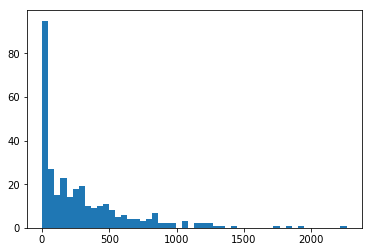

In [9]:
vc=air_rsv['air_store_id'].value_counts()
print vc.shape,air_rsv.shape
plt.hist(vc,bins=50);

2016-01-01 19:00:00 2017-05-31 21:00:00


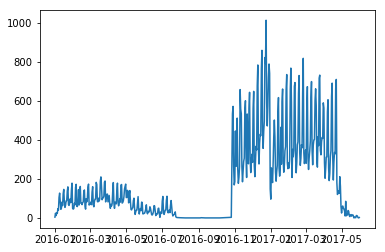

In [10]:
print air_rsv['visit_datetime'].min(),air_rsv['visit_datetime'].max()
air_rsv["visit_date"]=air_rsv['visit_datetime'].map(lambda u: u.date())
plt.plot(air_rsv["visit_date"].value_counts().sort_index());

2016-01-01 01:00:00 2017-04-22 23:00:00


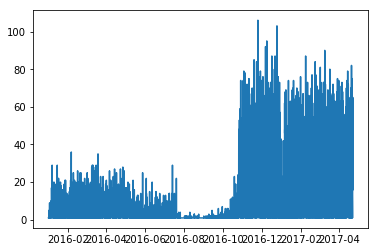

In [11]:
print air_rsv['reserve_datetime'].min(),air_rsv['reserve_datetime'].max()
air_rsv["reserve_date"]=air_rsv['reserve_datetime'].map(lambda u: u.date())
plt.plot(air_rsv["reserve_datetime"].value_counts().sort_index());

# hpg reserve

In [39]:
relation=pd.read_csv("../input/store_id_relation.csv")
relation.shape

(150, 2)

In [40]:
relation.head()

air_store_id          hpg_store_id
0  air_63b13c56b7201bd9  hpg_4bc649e72e2a239a
1  air_a24bf50c3e90d583  hpg_c34b496d0305a809
2  air_c7f78b4f3cba33ff  hpg_cd8ae0d9bbd58ff9
3  air_947eb2cae4f3e8f2  hpg_de24ea49dc25d6b8
4  air_965b2e0cf4119003  hpg_653238a84804d8e7

In [41]:
len(set(relation['air_store_id'])),len(set(relation['hpg_store_id']))

(150, 150)

In [42]:
1.0*len(sample_airids.intersection(relation['air_store_id']))/len(sample_airids)

0.18270401948842874

In [43]:
1.0*len(set(air_rsv['air_store_id']).intersection(relation['air_store_id']))

131.0

In [44]:
relation=dict(zip(relation['hpg_store_id'].values,relation['air_store_id'].values))

In [45]:
hpg_rsv=pd.read_csv("../input/hpg_reserve.csv",parse_dates=['visit_datetime','reserve_datetime'])

In [46]:
hpg_rsv['gap']=(hpg_rsv['visit_datetime']-hpg_rsv['reserve_datetime']).map(lambda u: np.round(u.days+u.seconds/3600.0/24.0,0))

In [47]:
print hpg_rsv.shape
hpg_rsv.head()

(2000320, 5)


hpg_store_id      visit_datetime    reserve_datetime  \
0  hpg_c63f6f42e088e50f 2016-01-01 11:00:00 2016-01-01 09:00:00   
1  hpg_dac72789163a3f47 2016-01-01 13:00:00 2016-01-01 06:00:00   
2  hpg_c8e24dcf51ca1eb5 2016-01-01 16:00:00 2016-01-01 14:00:00   
3  hpg_24bb207e5fd49d4a 2016-01-01 17:00:00 2016-01-01 11:00:00   
4  hpg_25291c542ebb3bc2 2016-01-01 17:00:00 2016-01-01 03:00:00   

   reserve_visitors  gap  
0                 1  0.0  
1                 3  0.0  
2                 2  0.0  
3                 5  0.0  
4                13  1.0

In [50]:
vc=hpg_rsv.gap.value_counts()
(vc/len(hpg_rsv)).head(20)

1.0     0.130206
2.0     0.110476
3.0     0.103967
0.0     0.084321
4.0     0.082029
5.0     0.060661
6.0     0.053806
7.0     0.047612
8.0     0.039503
9.0     0.032013
10.0    0.028076
11.0    0.023217
12.0    0.020211
13.0    0.018576
14.0    0.018205
15.0    0.015571
16.0    0.013825
17.0    0.011772
18.0    0.010686
19.0    0.008730
Name: gap, dtype: float64

(13325,) (2000320, 4)


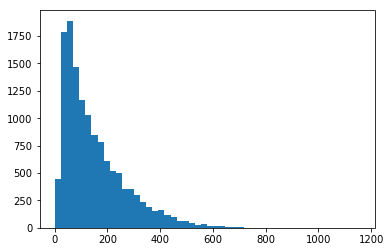

In [84]:
vc=hpg_rsv['hpg_store_id'].value_counts()
print vc.shape,hpg_rsv.shape
plt.hist(vc,bins=50);

2016-01-01 11:00:00 2017-05-31 23:00:00


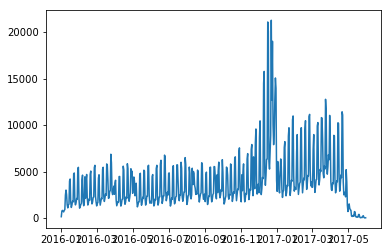

In [85]:
print hpg_rsv['visit_datetime'].min(),hpg_rsv['visit_datetime'].max()
hpg_rsv["visit_date"]=hpg_rsv['visit_datetime'].map(lambda u: u.date())
plt.plot(hpg_rsv["visit_date"].value_counts().sort_index());

2016-01-01 00:00:00 2017-04-22 23:00:00


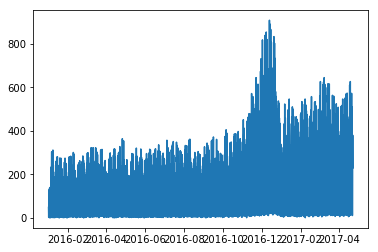

In [86]:
print hpg_rsv['reserve_datetime'].min(),hpg_rsv['reserve_datetime'].max()
hpg_rsv["reserve_date"]=hpg_rsv['reserve_datetime'].map(lambda u: u.date())
plt.plot(hpg_rsv["reserve_datetime"].value_counts().sort_index());

# air visits

In [18]:
visits=pd.read_csv("../input/air_visit_data.csv",parse_dates=['visit_date'])
visits.shape

(252108, 3)

In [22]:
visits['visit_date'].min(),visits['visit_date'].max()

(Timestamp('2016-01-01 00:00:00'), Timestamp('2017-04-22 00:00:00'))

In [19]:
visits.head()

air_store_id visit_date  visitors
0  air_ba937bf13d40fb24 2016-01-13        25
1  air_ba937bf13d40fb24 2016-01-14        32
2  air_ba937bf13d40fb24 2016-01-15        29
3  air_ba937bf13d40fb24 2016-01-16        22
4  air_ba937bf13d40fb24 2016-01-18         6

In [52]:
-(visits['visit_date'].min()-visits['visit_date'].max()).days*len(set(visits.air_store_id))

395433

In [53]:
len(set(visits.air_store_id)),len(sample_airids)

(829, 821)

In [54]:
len(sample_airids.difference(visits['air_store_id'])),\
len(set(visits['air_store_id']).difference(sample_airids)),\
1.0*len(sample_airids.difference(visits['air_store_id']))/len(sample_airids)

(0, 8, 0.0)

(829,) (252108, 3)


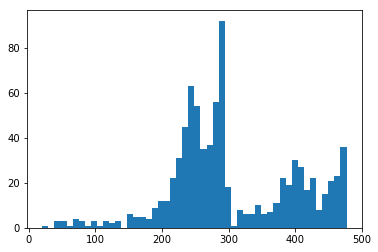

In [55]:
vc=visits['air_store_id'].value_counts()
print vc.shape,visits.shape
plt.hist(vc,bins=50);

2016-01-01 00:00:00 2017-04-22 00:00:00


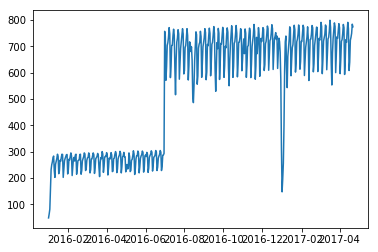

In [56]:
print visits['visit_date'].min(),visits['visit_date'].max()
plt.plot(visits["visit_date"].value_counts().sort_index());

2016-01-01 00:00:00 2017-04-22 00:00:00


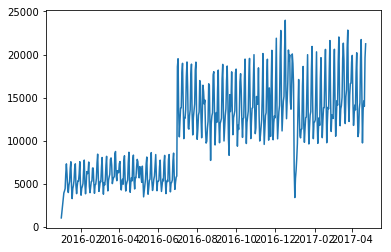

In [57]:
print visits['visit_date'].min(),visits['visit_date'].max()
plt.plot(visits[["visit_date",'visitors']].groupby('visit_date').sum().sort_index());

2016-01-01 00:00:00 2017-04-22 00:00:00


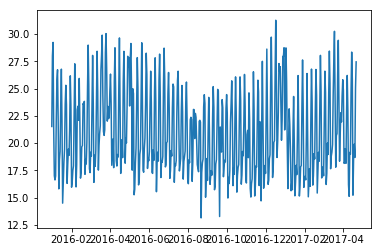

In [58]:
print visits['visit_date'].min(),visits['visit_date'].max()
plt.plot(visits[["visit_date",'visitors']].groupby('visit_date').mean().sort_index());

In [84]:
a=visits.groupby('air_store_id').aggregate({'visit_date':['min','max'],'visitors':['count']})

In [93]:
a['life']=(a['visit_date']['max']-a['visit_date']['min']).map(lambda u: u.days)
a['missing']=1-1.0/a['life']*a['visitors']['count']

2016-10-02  2016-11-06  2017-03-08  2017-03-17  2017-03-18  2017-03-31  \
max           1           1           1           1           1           1   

     2017-04-02  2017-04-16  2017-04-17  2017-04-18  2017-04-19  2017-04-20  \
max           1           2           2           2           2           6   

     2017-04-21  2017-04-22  
max          34         774

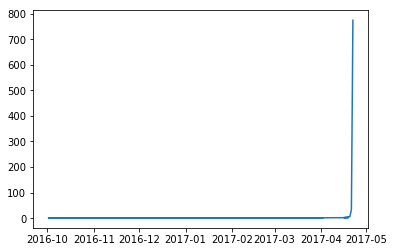

In [109]:
plt.plot(a['visit_date']['max'].value_counts());
a['visit_date']['max'].value_counts().sort_index().to_frame().T

2016-12-12  2017-01-24  2017-01-27  2017-01-30  2017-02-01  2017-02-08  \
min           1           1           1           1           1           1   

     2017-02-09  2017-02-15  2017-03-02  2017-03-07  
min           1           1           2           1

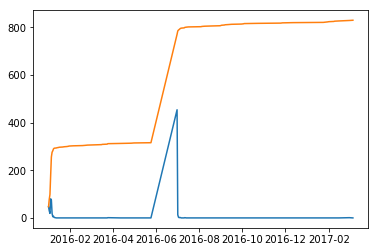

In [108]:
vc=a['visit_date']['min'].value_counts().sort_index()
plt.plot(vc);
display(vc.to_frame().tail(10).T)
plt.plot(np.cumsum(vc))

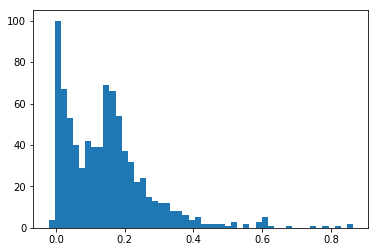

In [113]:
plt.hist(a['missing'],bins=50);

In [123]:
golden_week=visits[(visits['visit_date']>=pd.to_datetime('2016-04-20')) & (visits['visit_date']<=pd.to_datetime('2016-05-15'))]

In [124]:
golden_week.shape

(6887, 3)

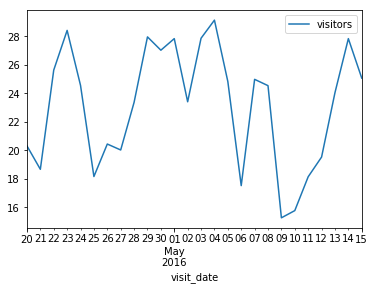

In [129]:
golden_week[['visit_date','visitors']].groupby('visit_date').mean().sort_index().plot()

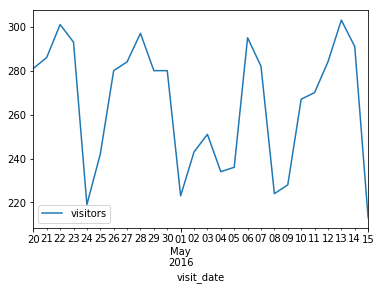

In [130]:
golden_week[['visit_date','visitors']].groupby('visit_date').count().sort_index().plot()

In [59]:
a=air_rsv[air_rsv['air_store_id']=='air_5f6fa1b897fe80d5'][['visit_date','reserve_visitors']].groupby('visit_date').sum()

In [60]:
b=visits[visits['air_store_id']=='air_5f6fa1b897fe80d5'][['visit_date','visitors']].groupby('visit_date').sum()

In [61]:
c=pd.concat([b,a],axis=1)
c.shape

(245, 2)

In [62]:
c.index.min(),c.index.max()

(Timestamp('2016-07-01 00:00:00'), Timestamp('2017-05-26 00:00:00'))

In [63]:
c=c.reindex(pd.date_range(c.index.min(),c.index.max()))

In [64]:
c.shape,display(c.corr())

visitors  reserve_visitors
visitors          1.000000          0.819957
reserve_visitors  0.819957          1.000000

((330, 2), None)

In [65]:
a=air_rsv[air_rsv['air_store_id']=='air_8093d0b565e9dbdf'][['visit_date','reserve_visitors']].groupby('visit_date').sum()

In [66]:
b=visits[visits['air_store_id']=='air_8093d0b565e9dbdf'][['visit_date','visitors']].groupby('visit_date').sum()

In [67]:
c=pd.concat([b,a],axis=1)
c.shape

(481, 2)

In [68]:
c.index.min(),c.index.max()

(Timestamp('2016-01-06 00:00:00'), Timestamp('2017-05-28 00:00:00'))

In [69]:
c=c.reindex(pd.date_range(c.index.min(),c.index.max()))

In [70]:
c.shape,display(c.corr())

visitors  reserve_visitors
visitors          1.000000          0.890685
reserve_visitors  0.890685          1.000000

((509, 2), None)

# date

In [158]:
dates=pd.read_csv("../input/date_info.csv",parse_dates=['calendar_date'])
dates.shape

(517, 3)

In [160]:
dates.min(),dates.max()

(calendar_date    2016-01-01 00:00:00
 day_of_week                   Friday
 holiday_flg                        0
 dtype: object, calendar_date    2017-05-31 00:00:00
 day_of_week                Wednesday
 holiday_flg                        1
 dtype: object)

In [161]:
dates['holiday_flg'].mean()

0.06769825918762089

# air info

In [2]:
info=pd.read_csv("../input/air_store_info.csv")
info.shape

(829, 5)

In [10]:
info['geo1']=info['air_area_name'].map(lambda u: u.split(" ")[0])
info['geo2']=info['air_area_name'].map(lambda u: u.split(" ")[1])

In [14]:
info.head()

air_store_id  air_genre_name                 air_area_name  \
0  air_0f0cdeee6c9bf3d7  Italian/French  Hyōgo-ken Kōbe-shi Kumoidōri   
1  air_7cc17a324ae5c7dc  Italian/French  Hyōgo-ken Kōbe-shi Kumoidōri   
2  air_fee8dcf4d619598e  Italian/French  Hyōgo-ken Kōbe-shi Kumoidōri   
3  air_a17f0778617c76e2  Italian/French  Hyōgo-ken Kōbe-shi Kumoidōri   
4  air_83db5aff8f50478e  Italian/French  Tōkyō-to Minato-ku Shibakōen   

    latitude   longitude       geo1       geo2  
0  34.695124  135.197852  Hyōgo-ken   Kōbe-shi  
1  34.695124  135.197852  Hyōgo-ken   Kōbe-shi  
2  34.695124  135.197852  Hyōgo-ken   Kōbe-shi  
3  34.695124  135.197852  Hyōgo-ken   Kōbe-shi  
4  35.658068  139.751599   Tōkyō-to  Minato-ku

In [16]:
info=pd.read_csv("../input/hpg_store_info.csv")
info['geo1']=info['hpg_area_name'].map(lambda u: u.split(" ")[0])
info['geo2']=info['hpg_area_name'].map(lambda u: u.split(" ")[1])
info.shape

(4690, 7)

In [17]:
info.head()

hpg_store_id  hpg_genre_name                  hpg_area_name  \
0  hpg_6622b62385aec8bf  Japanese style  Tōkyō-to Setagaya-ku Taishidō   
1  hpg_e9e068dd49c5fa00  Japanese style  Tōkyō-to Setagaya-ku Taishidō   
2  hpg_2976f7acb4b3a3bc  Japanese style  Tōkyō-to Setagaya-ku Taishidō   
3  hpg_e51a522e098f024c  Japanese style  Tōkyō-to Setagaya-ku Taishidō   
4  hpg_e3d0e1519894f275  Japanese style  Tōkyō-to Setagaya-ku Taishidō   

    latitude   longitude      geo1         geo2  
0  35.643675  139.668221  Tōkyō-to  Setagaya-ku  
1  35.643675  139.668221  Tōkyō-to  Setagaya-ku  
2  35.643675  139.668221  Tōkyō-to  Setagaya-ku  
3  35.643675  139.668221  Tōkyō-to  Setagaya-ku  
4  35.643675  139.668221  Tōkyō-to  Setagaya-ku

# weather

In [67]:
with open("../input/ghcnd-stations.txt") as f:
    text=f.readlines()
    text=[u.strip("\r\n") for u in text if u.startswith("JA")]
len(text)

202

In [74]:
def f(s):
    a=(s[:11],s[13:20],s[22:30],s[32:37],s[39:40],s[42:71],s[73:75],s[77:79],s[81:85])
    a=[u.strip() for u in a ]
    return a
f(text[0])

['JA000047401', '45.4170', '141.6830', '12.0', '', 'AKKANAI', 'SN', '', '7401']

In [103]:
station=pd.DataFrame([f(u) for u in text],columns=['station','LATITUDE','LONGITUDE','ELEVATION',
                                                   'STATE','NAME','GSN FLAG','HCN/CRN FLAG','WMO ID'])
for col in ['LATITUDE','LONGITUDE','ELEVATION']:
    station[col]=station[col].astype(np.float32)

In [79]:
station['STATE'].value_counts()

    202
Name: STATE, dtype: int64

In [81]:
station['NAME'].value_counts().head()

AJIMA       2
AKAMATSU    2
WAKUNI      2
SAKA        2
UKUOKA      2
Name: NAME, dtype: int64

In [83]:
station.head()

station LATITUDE LONGITUDE ELEVATION STATE         NAME GSN FLAG  \
0  JA000047401  45.4170  141.6830      12.0            AKKANAI       SN   
1  JA000047402  44.9330  142.5830       8.0        ITAMIESASHI            
2  JA000047404  44.3670  141.7000      10.0              ABORO            
3  JA000047405  44.5830  142.9670      15.0                 MU            
4  JA000047406  43.9500  141.6330      28.0               UMOI            

  HCN/CRN FLAG WMO ID  
0                7401  
1                7402  
2                7404  
3                7405  
4                7406

In [146]:
weather=pd.read_csv("../input/Japan_weather.csv",header=None)
weather.columns=['station','date','ELEMENT','VALUE1','MFLAG1','QFLAG1','SFLAG1','NA']
weather.date= pd.to_datetime(weather.date.astype(np.str)) 
weather.shape

(353715, 8)

In [45]:
weather['ELEMENT'].value_counts()
#           TAVG = Average temperature (tenths of degrees C)
#           PRCP = Precipitation (tenths of mm)
# 	   SNWD = Snow depth (mm)
#           TMAX = Maximum temperature (tenths of degrees C)
#            TMIN = Minimum temperature (tenths of degrees C)


TAVG    104879
PRCP     98352
TMAX     92459
TMIN     55232
SNWD      2793
Name: ELEMENT, dtype: int64

In [39]:
#           B     = precipitation total formed from two 12-hour totals
#    H     = represents highest or lowest hourly temperature (TMAX or TMIN) 
#            or the average of hourly values (TAVG)
            
weather['MFLAG1'].value_counts()

H    104879
B     58806
Name: MFLAG1, dtype: int64

In [42]:
# S     = failed spatial consistency check
# O     = failed climatological outlier check
#           I     = failed internal consistency check
weather['QFLAG1'].value_counts()

I    4
O    4
S    1
Name: QFLAG1, dtype: int64

In [41]:
# S     = Global Summary of the Day (NCDC DSI-9618)
weather['SFLAG1'].value_counts()

S    353715
Name: SFLAG1, dtype: int64

In [147]:
weather.head()

station       date ELEMENT  VALUE1 MFLAG1 QFLAG1 SFLAG1  NA
0  JA000047612 2016-01-01    TMAX      54    NaN    NaN      S NaN
1  JA000047612 2016-01-01    TMIN       9    NaN    NaN      S NaN
2  JA000047612 2016-01-01    PRCP     150      B    NaN      S NaN
3  JA000047612 2016-01-01    TAVG      37      H    NaN      S NaN
4  JA000047616 2016-01-01    TMAX     102    NaN    NaN      S NaN

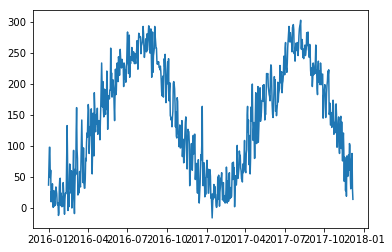

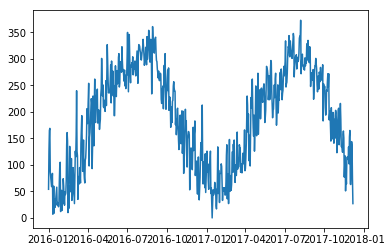

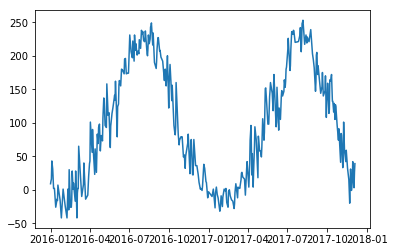

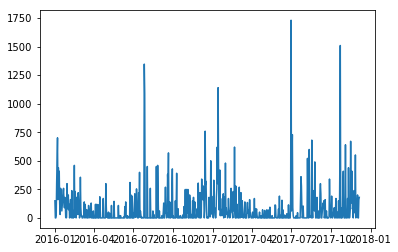

In [155]:
s=weather[(weather['station']=='JA000047612') & (weather['ELEMENT']=='TAVG')] 
plt.plot(s['date'],s['VALUE1']);plt.show()
s=weather[(weather['station']=='JA000047612') & (weather['ELEMENT']=='TMAX')] 
plt.plot(s['date'],s['VALUE1']);plt.show()
s=weather[(weather['station']=='JA000047612') & (weather['ELEMENT']=='TMIN')] 
plt.plot(s['date'],s['VALUE1']);plt.show()
s=weather[(weather['station']=='JA000047612') & (weather['ELEMENT']=='PRCP')] 
plt.plot(s['date'],s['VALUE1']);plt.show()
#s=weather[(weather['station']=='JA000047612') & (weather['ELEMENT']=='SNWD')] 
#plt.plot(s['date'],s['VALUE1']);plt.show()


In [131]:
def distance(x1,y1,x2,y2):
    dx = np.deg2rad(x2-x1) 
    dy = np.deg2rad(y2-y1) 
    R = 6371.0; #// k metres
    x1 = np.deg2rad(x1);
    x2 = np.deg2rad(x2);

    a = np.sin(dx/2) * np.sin(dx/2) + \
            np.cos(x1) * np.cos(x2) * \
            np.sin(dy/2) * np.sin(dy/2);
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a));

    d = R * c;
    return d

def find_station(store_info):
    x,y=store_info[['latitude',"longitude"]]
    lst=[]
    for i in station.index:
        station_id, u,v=station.loc[i,['station','LATITUDE','LONGITUDE']]
        #d=np.sqrt((x-u)**2+(y-v)**2)
        d=distance(x,y,u,v)
        lst.append([station_id,d])
    selected=sorted(lst,key=lambda u: u[1])[0]
    #print x,y,selected
    #print sorted(lst,key=lambda u: u[1])
    return selected

In [132]:
#JA000047662

In [133]:
find_station(info.iloc[0])

['JA000047662', 9.9373819632381704]

In [86]:
info.head()

hpg_store_id  hpg_genre_name                  hpg_area_name  \
0  hpg_6622b62385aec8bf  Japanese style  Tōkyō-to Setagaya-ku Taishidō   
1  hpg_e9e068dd49c5fa00  Japanese style  Tōkyō-to Setagaya-ku Taishidō   
2  hpg_2976f7acb4b3a3bc  Japanese style  Tōkyō-to Setagaya-ku Taishidō   
3  hpg_e51a522e098f024c  Japanese style  Tōkyō-to Setagaya-ku Taishidō   
4  hpg_e3d0e1519894f275  Japanese style  Tōkyō-to Setagaya-ku Taishidō   

    latitude   longitude      geo1         geo2  
0  35.643675  139.668221  Tōkyō-to  Setagaya-ku  
1  35.643675  139.668221  Tōkyō-to  Setagaya-ku  
2  35.643675  139.668221  Tōkyō-to  Setagaya-ku  
3  35.643675  139.668221  Tōkyō-to  Setagaya-ku  
4  35.643675  139.668221  Tōkyō-to  Setagaya-ku

In [87]:
!ls ../input/*.csv

../input/air_reserve.csv     ../input/hpg_reserve.csv
../input/air_store_info.csv  ../input/hpg_store_info.csv
../input/air_visit_data.csv  ../input/sample_submission.csv
../input/date_info.csv	     ../input/store_id_relation.csv
